# WOW - Data Sprint - SIGMAS

### Contents:

- [1. Data Loading and Cleaning](#1.-Data-Loading-and-Cleaning)
- [1a. Identifying Null Values](#1a.-Identifying-Null-Values)
- [1b. Converting Y/N values to Boolean](#1b.-Converting-Y/N-values-to-Boolean)
- [1c. Dealing with null postal codes](#1c.-Dealing-with-null-postal-codes)
- [1d. Filling null values for Mall Nearest Distance](#1d.-Filling-null-values-for-Mall-Nearest-Distance)
- [2. Creating new variables](#2.-Creating-new-variables)
- [2a. Label encoding Flat type](#2a.-Label-encoding-Flat-type)
- [3. Repeat the process for test](#3.-Repeat-the-process-for-test)
- [4. Concatenate both train and test data](#4.-Concatenate-both-train-and-test-data)
- [5. Creating more variables through One Hot encoding for string nominal variables](#5.-Creating-more-variables-through-One-Hot-encoding-for-string-nominal-variables)
- [6. Linear Regression check](#6.-Linear-Regression-check)
- [7. Setup pycaret regression](#7.-Setup-pycaret-regression)
- [7a. Comparing best models for pycaret regression](#7a.-Comparing-best-models-for-pycaret-regression)
- [7b. Split the dataset for RMSE/R2 analysis](#7b.-Split-the-dataset-for-RMSE/R2-analysis)
- [8. Random Forest](#8.-Random-Forest)
- [9. Extra Trees](#9.-Extra-Trees)
- [10. XGBoost](#10.-XGBoost)
- [11. Conclusion](#11.-Conclusion)
- [12. Recommendations](#11.-Recommendations)
- [13. Limitations](#11.-Limitations)

### 1. Data Loading and Cleaning

In [68]:
import pandas as pd
import numpy as np

In [69]:
#upload and read the train data
hdb_train = pd.read_csv('train.csv')

In [70]:
#to view and understand the data inside the train csv file
hdb_train.head()
hdb_train.info()
hdb_train.columns
hdb_train.shape
pd.DataFrame(hdb_train.dtypes, columns=["DataTypes"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

,DataTypes
id,int64
Tranc_YearMonth,object
town,object
flat_type,object
block,object
...,...
sec_sch_name,object
cutoff_point,int64
affiliation,int64
sec_sch_latitude,float64


### 1a. Identifying Null Values

In [71]:
#finding out which variables have null values and sort them in descending order
pd.set_option('display.max_rows', None)
hdb_train.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m           97390
Mall_Within_500m             92789
Hawker_Within_1km            60868
Hawker_Within_2km            29202
Mall_Within_1km              25426
Mall_Within_2km               1940
Mall_Nearest_Distance          829
Hawker_Nearest_Distance          0
mrt_nearest_distance             0
hawker_market_stalls             0
hawker_food_stalls               0
id                               0
bus_interchange                  0
planning_area                    0
Longitude                        0
Latitude                         0
postal                           0
other_room_rental                0
mrt_name                         0
mrt_interchange                  0
Tranc_YearMonth                  0
pri_sch_affiliation              0
sec_sch_latitude                 0
affiliation                      0
cutoff_point                     0
sec_sch_name                     0
sec_sch_nearest_dist             0
pri_sch_longitude                0
pri_sch_latitude    

In [72]:
#haven't run
# hdb_train['Mall_Within_500m'].fillna(0, inplace=True)
# hdb_train['Mall_Within_1km'].fillna(0, inplace=True)
# hdb_train['Mall_Within_2km'].fillna(0, inplace=True)
# hdb_train['Hawker_Within_500m'].fillna(0, inplace=True)
# hdb_train['Hawker_Within_1km'].fillna(0, inplace=True)
# hdb_train['Hawker_Within_2km'].fillna(0, inplace=True)
# hdb_train.isnull().sum().sort_values(ascending=False)

### 1b. Converting Y/N values to Boolean

This is done so that these variables can be analyzed as Boolean values rather than string values.

In [73]:
#converting the columns residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion into boolean values
hdb_train['residential'].replace("Y", "1", inplace=True)
hdb_train['residential'].replace("N", "0", inplace=True)
hdb_train['commercial'].replace("Y", "1", inplace=True)
hdb_train['commercial'].replace("N", "0", inplace=True)
hdb_train['market_hawker'].replace("Y", "1", inplace=True)
hdb_train['market_hawker'].replace("N", "0", inplace=True)
hdb_train['multistorey_carpark'].replace("Y", "1", inplace=True)
hdb_train['multistorey_carpark'].replace("N", "0", inplace=True)
hdb_train['precinct_pavilion'].replace("Y", "1", inplace=True)
hdb_train['precinct_pavilion'].replace("N", "0", inplace=True)

### 1c. Dealing with null postal codes

There were some postal codes that had null values. We noticed that these missing values were specific to two specific addresses - hence we filled it with the postal code that was applicable for these two addresses.

In [74]:
#postal code NIL. 215 CHOA CHU KANG CTRL - 680215. 238 COMPASSVALE WALK - 540238.
# Replace 'NIL' postal codes based on 'street_name' conditions
hdb_train.loc[(hdb_train['street_name'] == "CHOA CHU KANG CTRL") & (hdb_train['postal'] == "NIL"), 'postal'] = 680215
hdb_train.loc[(hdb_train['street_name'] == "COMPASSVALE WALK") & (hdb_train['postal'] == "NIL"), 'postal'] = 540238

In [75]:
len(hdb_train[hdb_train['postal'] == "NIL"])

0

### 1d. Filling null values for Mall Nearest Distance

Likewise, Mall Nearest Distance also had missing values. While it would have been ideal to impute mean values of the closest addresses, we opted to do it by planning areas for greater efficiency, while maintaining a level of accuracy in terms of what the mall nearest distance would be.

In [76]:
# List of planning areas
planning_areas = ['Sengkang', 'Choa Chu Kang', 'Geylang', 'Punggol', 'Clementi', 'Tampines', 'Queenstown', 'Bukit Panjang', 'Yishun', 'Bedok', 'Pasir Ris', 'Woodlands', 'Bukit Merah', 'Jurong East', 'Hougang', 'Toa Payoh', 'Ang Mo Kio', 'Bishan', 'Jurong West', 'Kallang', 'Novena']
# Iterate through each planning area and replace blank values
for area in planning_areas:
# Filter out rows with blank values
    area_df = hdb_train[(hdb_train['planning_area'] == area) & (hdb_train['Mall_Nearest_Distance'].notnull())]
# Calculate mean distance for non-blank values
    mean_distance = hdb_train['Mall_Nearest_Distance'].mean()
# Replace blank values with mean distance
    hdb_train.loc[(hdb_train['planning_area'] == area) & (hdb_train['Mall_Nearest_Distance'].isnull()), 'Mall_Nearest_Distance'] = mean_distance

In [77]:
len(hdb_train[hdb_train['postal'].isnull()])

0

### 2. Creating new variables

### 2a. Label encoding Flat type

In [78]:
label_map = {
    "1 ROOM": 1,
    "2 ROOM": 2,
    "3 ROOM": 3,
    "4 ROOM": 4,
    "5 ROOM": 5,
    "MULTI-GENERATION": 6,
    "EXECUTIVE": 7
}
hdb_train['flat_type_int'] = hdb_train['flat_type'].map(label_map)

In [79]:
hdb_train['flat_type_int'].head(10)

0    4
1    5
2    7
3    4
4    4
5    3
6    5
7    3
8    5
9    5
Name: flat_type_int, dtype: int64

### 3. Repeat the process for test

In [80]:
hdb_test = pd.read_csv('test.csv')

We manually calculated the resale price for the test CSV based on the provided floor area and price.

In [81]:
hdb_test['resale_price'] = hdb_test['floor_area_sqft'] * hdb_test['price_per_sqft']

In [82]:
hdb_test.head()
hdb_test.info()
hdb_test.columns
hdb_test.shape
pd.DataFrame(hdb_test.dtypes, columns=["DataTypes"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

,DataTypes
id,int64
Tranc_YearMonth,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64


However, the created resale_price column appears at the end of the hdb_test dataframe. As such, we had to insert it at the same position that it was at for the hdb_train dataframe, so that we can concatenate both dataframes (to be explained later).

In [83]:
# Step 1: Remove the column
col_to_move = hdb_test.pop('resale_price')

# Step 2: Insert the column at the desired index (10 in this case)
hdb_test.insert(10, 'resale_price', col_to_move)

In [84]:
hdb_test.isnull().sum().sort_values(ascending=False)

Hawker_Within_500m           10755
Mall_Within_500m             10292
Hawker_Within_1km             6729
Hawker_Within_2km             3254
Mall_Within_1km               2786
Mall_Within_2km                213
Mall_Nearest_Distance           84
Hawker_Nearest_Distance          0
mrt_nearest_distance             0
hawker_market_stalls             0
hawker_food_stalls               0
id                               0
bus_interchange                  0
planning_area                    0
Longitude                        0
Latitude                         0
postal                           0
other_room_rental                0
mrt_name                         0
mrt_interchange                  0
Tranc_YearMonth                  0
pri_sch_affiliation              0
sec_sch_latitude                 0
affiliation                      0
cutoff_point                     0
sec_sch_name                     0
sec_sch_nearest_dist             0
pri_sch_longitude                0
pri_sch_latitude    

In [85]:
#converting the columns residential, commercial, market_hawker, multistorey_carpark, precinct_pavilion into boolean values
hdb_test['residential'].replace("Y", "1", inplace=True)
hdb_test['residential'].replace("N", "0", inplace=True)
hdb_test['commercial'].replace("Y", "1", inplace=True)
hdb_test['commercial'].replace("N", "0", inplace=True)
hdb_test['market_hawker'].replace("Y", "1", inplace=True)
hdb_test['market_hawker'].replace("N", "0", inplace=True)
hdb_test['multistorey_carpark'].replace("Y", "1", inplace=True)
hdb_test['multistorey_carpark'].replace("N", "0", inplace=True)
hdb_test['precinct_pavilion'].replace("Y", "1", inplace=True)
hdb_test['precinct_pavilion'].replace("N", "0", inplace=True)

In [86]:
#postal code NIL. 215 CHOA CHU KANG CTRL - 680215. 238 COMPASSVALE WALK - 540238.
# Replace 'NIL' postal codes based on 'street_name' conditions
hdb_test.loc[(hdb_test['street_name'] == "CHOA CHU KANG CTRL") & (hdb_test['postal'] == "NIL"), 'postal'] = 680215
hdb_test.loc[(hdb_test['street_name'] == "COMPASSVALE WALK") & (hdb_test['postal'] == "NIL"), 'postal'] = 540238

In [87]:
len(hdb_test[hdb_test['postal'] == "NIL"])

0

In [88]:
# List of planning areas
planning_areas = ['Sengkang', 'Choa Chu Kang', 'Geylang', 'Punggol', 'Clementi', 'Tampines', 'Queenstown', 'Bukit Panjang', 'Yishun', 'Bedok', 'Pasir Ris', 'Woodlands', 'Bukit Merah', 'Jurong East', 'Hougang', 'Toa Payoh', 'Ang Mo Kio', 'Bishan', 'Jurong West', 'Kallang', 'Novena']
# Iterate through each planning area and replace blank values
for area in planning_areas:
# Filter out rows with blank values
    area_df = hdb_test[(hdb_test['planning_area'] == area) & (hdb_test['Mall_Nearest_Distance'].notnull())]
# Calculate mean distance for non-blank values
    mean_distance = hdb_test['Mall_Nearest_Distance'].mean()
# Replace blank values with mean distance
    hdb_test.loc[(hdb_test['planning_area'] == area) & (hdb_test['Mall_Nearest_Distance'].isnull()), 'Mall_Nearest_Distance'] = mean_distance

In [89]:
len(hdb_test[hdb_test['postal'].isnull()])

0

In [90]:
label_map = {
    "1 ROOM": 1,
    "2 ROOM": 2,
    "3 ROOM": 3,
    "4 ROOM": 4,
    "5 ROOM": 5,
    "MULTI-GENERATION": 6,
    "EXECUTIVE": 7
}
hdb_test['flat_type_int'] = hdb_test['flat_type'].map(label_map)

In [91]:
hdb_test['flat_type_int'].head(10)

0    4
1    5
2    3
3    4
4    4
5    3
6    3
7    3
8    3
9    3
Name: flat_type_int, dtype: int64

In [92]:
pd.set_option('display.max_columns', None)
hdb_train.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,flat_type_int
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,4
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,5
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,7
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,4
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,4


In [93]:
pd.set_option('display.max_columns', None)
hdb_test.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,flat_type_int
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,360999.999971,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,399.258551,34,12,1986,1,1,0,0,0,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,NaN,2.0,4.0,687.576779,NaN,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987,4
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,480000.000041,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,398.152572,13,14,2002,1,0,0,0,0,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,NaN,1.0,3.0,2122.346226,NaN,NaN,NaN,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098,5
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,350887.999967,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,479.386626,41,12,1979,1,0,0,0,0,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,NaN,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430,3
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,320000.000044,2017,10,2,1,3,2,4 ROOM New Generation,"29, MARSILING DR",1044.108,306.481705,42,14,1976,1,0,0,0,0,104,0,0,0,104,0,0,0,0,0,0,0,0,731029,1.442748,103.772922,Woodlands,1272.737194,NaN,NaN,3.0,501.892158,NaN,1.0,2.0,52,112,1117.203587,Marsiling,0,0,1.432757,103.773982,108.459039,Blk 32,1.443650,103.773295,929.744711,Marsiling Primary School,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499,4
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,399998.999965,2016,8,17,16,18,17,4 ROOM Model A,"170, BT BATOK WEST AVE 8",1108.692,360.784600,36,25,1985,1,0,0,0,0,144,0,0,0,48,96,0,0,0,0,0,0,0,650170,1.346556,103.740101,Bukit Batok,1070.963675,NaN,NaN,5.0,437.593564,1.0,2.0,2.0,60,87,987.976010,Chinese Garden,0,0,1.342441,103.732225,113.645431,Blk 169,1.346899,103.741064,309.926934,Princess Elizabeth Primary School,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873,4


### 4. Concatenate both train and test data

We concatenated both train and test datasets so that all data would be in a single dataframe for easier analysis.

In [94]:
# Concatenate the test dataset to the train dataset through rows
hdb_combined = pd.concat([hdb_train, hdb_test], axis=0, ignore_index=True)
hdb_combined_df = pd.DataFrame(hdb_combined)

In [95]:
pd.set_option('display.max_columns', None)
hdb_combined_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,flat_type_int
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,4
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,5
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,7
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,4
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,4


### 5. Creating more variables through One Hot encoding for string nominal variables

We noticed that critical variables such as town and flat_models were string variables and were not being represented in regressions. As such, we had to perform One Hot encoding for these variables in order for these variables to be run through regression.

In [96]:
# Assuming 'hdb_combined_df' is your DataFrame and 'town' is the categorical column you want to encode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# Initialize the encoder
encoder_one_hot = OneHotEncoder(sparse_output=False)

# Fit and transform the 'town' column
town_flat_model_encoded = encoder_one_hot.fit_transform(hdb_combined_df[['town', 'flat_model']])

# Create a DataFrame with the encoded feature names
town_flat_model_encoded_df = pd.DataFrame(town_flat_model_encoded, columns=encoder_one_hot.get_feature_names_out(['town', 'flat_model']))

# Concatenate the new DataFrame to the original DataFrame
hdb_combined_df = pd.concat([hdb_combined_df, town_flat_model_encoded_df], axis=1)

In [97]:
hdb_combined_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,flat_type_int,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### 6. Linear Regression check

We ran a linear regression to get a rough idea on the variables that had significant coefficients in order to cut down on the number of variables

In [98]:
# from pycaret.regression import *
# setup(data = hdb_combined_df, target = 'resale_price', session_id = 1)

In [99]:
# model = create_model('lr')

In [100]:
# features = get_config('X_train_transformed').columns
# coefficients = model.coef_
# intercept = model.intercept_

In [101]:
# if len(coefficients) == len(features):
#     # Create a DataFrame to display coefficients alongside feature names
#     coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

#     pd.set_option('display.float_format', '{:.10f}'.format)  # This sets the precision to 10 decimal places

#     pd.set_option('display.max_rows', None)
#     print("Intercept:", intercept)
#     print(coef_df.sort_values(by='Coefficient', ascending=False))
# else:
#     print("The number of coefficients does not match the number of features.")

In [102]:
hdb_combined_df.columns = [col.replace(' ', '_') for col in hdb_combined_df.columns]

In [103]:
hdb_combined_df_dropped = hdb_combined_df.drop(['flat_model', 'town', 'storey_range', 'flat_type', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'id', 'exec_sold', 'address', 'cutoff_point', 'vacancy', 'pri_sch_latitude', 'street_name', 'bus_stop_name', 'block', 'planning_area', 'sec_sch_name', 'Hawker_Within_2km', 'postal', 'multigen_sold', 'Tranc_Month', 'Hawker_Within_1km', 'Mall_Within_2km', 'Mall_Within_1km', 'pri_sch_name', 'pri_sch_affiliation', 'sec_sch_longitude', 'mrt_latitude', 'residential', 'mrt_name', 'full_flat_type', 'mid_storey', 'studio_apartment_sold', '2room_rental', '3room_rental', 'other_room_rental', '1room_rental', 'pri_sch_longitude', 'hawker_food_stalls', 'hawker_market_stalls', 'bus_stop_latitude', 'mrt_longitude', 'Latitude', 'Tranc_YearMonth', 'sec_sch_latitude', 'Longitude', 'bus_stop_longitude', 'price_per_sqft', 'floor_area_sqft', 'lease_commence_date', 'year_completed'], axis=1)

In [135]:
# Specify the file path and filename
file_path = 'combined_clean.csv'

# Export the DataFrame to CSV
data.to_csv(file_path, index=False)

We dropped variables that had had low coefficients that had been run through pycaret linear regression.

### 7. Setup pycaret regression

In [104]:
from pycaret.regression import setup, get_config

# Assuming hdb_train is your DataFrame and 'resale_price' is the target column
regression_setup = setup(data=hdb_combined_df_dropped, 
                         target='resale_price', 
                         session_id=1, 
                         feature_selection=True, n_features_to_select = 70,
                         train_size=0.8)

# Get the list of selected features
selected_features = get_config('X').columns

# Print the selected features
print("Selected Features:")
print(selected_features)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2224
[LightGBM] [Info] Number of data points in the train set: 133896, number of used features: 66
[LightGBM] [Info] Start training from score 449315.282448


,Description,Value
0,Session id,1
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(167371, 71)"
4,Transformed data shape,"(167371, 71)"
5,Transformed train set shape,"(133896, 71)"
6,Transformed test set shape,"(33475, 71)"
7,Numeric features,66
8,Categorical features,4
9,Rows with missing values,88.2%


Selected Features:
Index(['floor_area_sqm', 'Tranc_Year', 'lower', 'upper', 'mid', 'hdb_age',
       'max_floor_lvl', 'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', 'Mall_Nearest_Distance',
       'Mall_Within_500m', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'mrt_nearest_distance', 'bus_interchange', 'mrt_interchange',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'affiliation', 'flat_type_int',
       'town_ANG_MO_KIO', 'town_BEDOK', 'town_BISHAN', 'town_BUKIT_BATOK',
       'town_BUKIT_MERAH', 'town_BUKIT_PANJANG', 'town_BUKIT_TIMAH',
       'town_CENTRAL_AREA', 'town_CHOA_CHU_KANG', 'town_CLEMENTI',
       'town_GEYLANG', 'town_HOUGANG', 'town_JURONG_EAST', 'town_JURONG_WEST',
       'town_KALLANG/WHAMPOA', 'town_MARINE_PARADE', 'town_PASIR_RIS',
       'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG',
       'town_SERANGOON', 'town_TAMPINES',

### 7a. Comparing best models for pycaret regression

In [116]:
from pycaret.regression import *
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,17950.2625,625965242.4790,25017.5966,0.9697,0.0545,0.0408,58.4740
et,Extra Trees Regressor,18341.8805,656761968.7023,25624.5845,0.9682,0.0557,0.0416,61.3480
xgboost,Extreme Gradient Boosting,19614.4371,713163398.4000,26703.3059,0.9654,0.0580,0.0444,29.9720
lightgbm,Light Gradient Boosting Machine,22343.8317,929058877.9764,30479.1644,0.9550,0.0653,0.0503,2.4400
dt,Decision Tree Regressor,23915.3514,1162321636.6047,34091.1059,0.9437,0.0738,0.0541,3.2580
knn,K Neighbors Regressor,31802.6797,1995870617.6000,44668.1684,0.9033,0.0991,0.0734,6.3900
gbr,Gradient Boosting Regressor,33388.7286,2150873394.4276,46376.2941,0.8957,0.0956,0.0743,20.7340
br,Bayesian Ridge,37020.6041,2385394210.6153,48840.0703,0.8844,0.1175,0.0863,2.7120
ridge,Ridge Regression,37020.8443,2385405392.6972,48840.1831,0.8844,0.1175,0.0863,1.9010
lasso,Lasso Regression,37020.3177,2385409498.7196,48840.2280,0.8844,0.1175,0.0863,30.1160


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

We can see that the top 3 models are **1) Random Forest, 2) Extra Trees and 3) xgboost.** The **random forest regressor** with **66 features** was the most successful in predicting the HDB resale price.

However, we need to see the RMSE of the train/test split.

### 7b. Split the dataset for RMSE/R2 analysis

In [118]:
from sklearn.model_selection import train_test_split
# Assume hdb_combined_df_dropped is your DataFrame
data = hdb_combined_df_dropped.copy()

# Define the target variable
target = 'resale_price'

# Split the data manually
train_data, test_data = train_test_split(data, test_size=0.3, random_state=1)

# Separate features and target for test data
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

In [119]:
# Set up PyCaret environment with train data
regression_setup = setup(data=train_data, 
                         target=target, 
                         session_id=1, 
                         html=False)  # silent=True to avoid interactive confirmation

# Get the list of selected features
selected_features = get_config('X').columns

# Print the selected features
print("Selected Features:")
print(selected_features)

                    Description             Value
0                    Session id                 1
1                        Target      resale_price
2                   Target type        Regression
3           Original data shape      (117159, 71)
4        Transformed data shape      (117159, 71)
5   Transformed train set shape       (82011, 71)
6    Transformed test set shape       (35148, 71)
7              Numeric features                66
8          Categorical features                 4
9      Rows with missing values             88.1%
10                   Preprocess              True
11              Imputation type            simple
12           Numeric imputation              mean
13       Categorical imputation              mode
14     Maximum one-hot encoding                25
15              Encoding method              None
16               Fold Generator             KFold
17                  Fold Number                10
18                     CPU Jobs                -1


### 8. Random Forest

In [120]:
rf_model = create_model('rf')

                  MAE                  MSE             RMSE           R2  \
Fold                                                                       
0    19205.0566000000 776953357.6529999971 27873.8831000000 0.9621000000   
1    18819.2706000000 706696153.8846000433 26583.7573000000 0.9658000000   
2    19049.8169000000 724422115.6315000057 26915.0909000000 0.9647000000   
3    18717.7301000000 671534533.6092000008 25913.9834000000 0.9677000000   
4    19071.4959000000 713254116.1205999851 26706.8178000000 0.9650000000   
5    18536.0374000000 663598731.0175000429 25760.4101000000 0.9670000000   
6    18909.8255000000 700065239.2496000528 26458.7460000000 0.9663000000   
7    19033.7264000000 713551320.2847000360 26712.3814000000 0.9649000000   
8    18988.4345000000 701386932.5463000536 26483.7107000000 0.9657000000   
9    19131.5944000000 714964680.2459000349 26738.8235000000 0.9654000000   
Mean 18946.2988000000 708642718.0242999792 26614.7604000000 0.9655000000   
Std    193.6

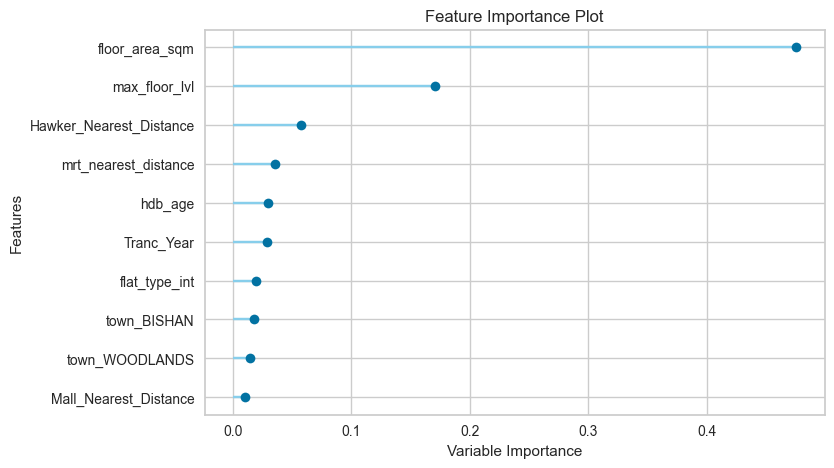

In [121]:
# Plot feature importance for Random Forest Regressor
plot_model(rf_model, plot='feature')

In [122]:
# Get feature importance data
rf_feature_importance = rf_model.feature_importances_

# Assuming `selected_features` is a list of feature names used in the model
rf_feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': rf_feature_importance})

# Sort features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
pd.set_option('display.max_rows', None)

# Print the feature importance
print(rf_feature_importance_df)

                          Feature   Importance
0                  floor_area_sqm 0.4758283894
6                   max_floor_lvl 0.1708518911
14        Hawker_Nearest_Distance 0.0577252094
16           mrt_nearest_distance 0.0355330149
5                         hdb_age 0.0298094761
..                            ...          ...
64  flat_model_Premium_Maisonette 0.0000263339
10              precinct_pavilion 0.0000100290
9             multistorey_carpark 0.0000003310
8                   market_hawker 0.0000001499
50              flat_model_2-room 0.0000000642

[70 rows x 2 columns]


In [123]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the training data
train_predictions = predict_model(rf_model, data=train_data)

# Calculate RMSE and R² for training data
train_rmse = np.sqrt(mean_squared_error(train_predictions[target], train_predictions['prediction_label']))
train_r2 = r2_score(train_predictions[target], train_predictions['prediction_label'])

print(f"Train RMSE: {train_rmse}")
print(f"Train R^2: {train_r2}")

# Predict on the test data
test_predictions = predict_model(rf_model, data=test_data)

# Calculate RMSE and R² for test data
test_rmse = np.sqrt(mean_squared_error(test_predictions[target], test_predictions['prediction_label']))
test_r2 = r2_score(test_predictions[target], test_predictions['prediction_label'])

print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {test_r2}")

                     Model              MAE                  MSE  \
0  Random Forest Regressor 10788.8629000000 281899826.4296000004   

              RMSE           R2        RMSLE         MAPE  
0 16789.8727000000 0.9863000000 0.0365000000 0.0245000000  
Train RMSE: 16789.872734167806
Train R^2: 0.9863198593790728
                     Model              MAE                  MSE  \
0  Random Forest Regressor 18754.3923000000 687896818.2779999971   

              RMSE           R2        RMSLE         MAPE  
0 26227.7871000000 0.9662000000 0.0567000000 0.0425000000  
Test RMSE: 26227.78714032186
Test R^2: 0.9662239223194132


### 9. Extra Trees

In [124]:
et_model = create_model('et')

                  MAE                  MSE             RMSE           R2  \
Fold                                                                       
0    18939.9021000000 742633050.9153000116 27251.2945000000 0.9638000000   
1    18620.5683000000 670024503.1987999678 25884.8315000000 0.9675000000   
2    19025.5268000000 708746663.0658999681 26622.2964000000 0.9654000000   
3    18854.8420000000 685503435.4622000456 26182.1205000000 0.9670000000   
4    18945.2553000000 704766525.5369000435 26547.4392000000 0.9655000000   
5    18543.6803000000 670162011.0267000198 25887.4875000000 0.9667000000   
6    18820.5959000000 685905195.4560999870 26189.7918000000 0.9670000000   
7    18834.7479000000 690716798.3279000521 26281.4916000000 0.9660000000   
8    19106.3069000000 717920069.2457000017 26794.0305000000 0.9648000000   
9    19195.4241000000 715563481.3645000458 26750.0183000000 0.9653000000   
Mean 18888.6850000000 699194173.3600000143 26439.0802000000 0.9659000000   
Std    191.2

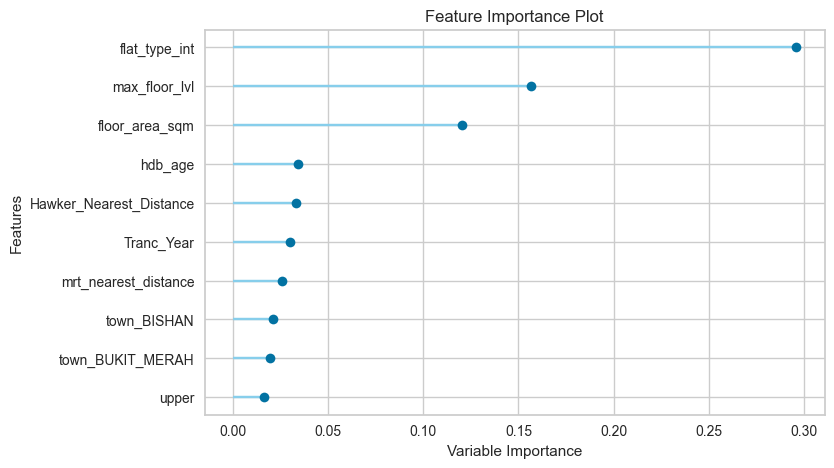

In [125]:
# Plot feature importance for Extra Trees Regressor
plot_model(et_model, plot='feature')

In [132]:
# Get feature importance data
et_feature_importance = et_model.feature_importances_

# Assuming `selected_features` is a list of feature names used in the model
et_feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': et_feature_importance})

# Sort features by importance
et_feature_importance_df = et_feature_importance_df.sort_values(by='Importance', ascending=False)
pd.set_option('display.max_rows', None)

# Print the feature importance
print(et_feature_importance_df)

                          Feature   Importance
23                  flat_type_int 0.2959457295
6                   max_floor_lvl 0.1568770149
0                  floor_area_sqm 0.1204121660
5                         hdb_age 0.0345238956
14        Hawker_Nearest_Distance 0.0329957967
..                            ...          ...
64  flat_model_Premium_Maisonette 0.0000505859
10              precinct_pavilion 0.0000190343
8                   market_hawker 0.0000078673
9             multistorey_carpark 0.0000019955
50              flat_model_2-room 0.0000000759

[70 rows x 2 columns]


In [133]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict on the training data
train_predictions = predict_model(et_model, data=train_data)

# Calculate RMSE and R² for training data
train_rmse = np.sqrt(mean_squared_error(train_predictions[target], train_predictions['prediction_label']))
train_r2 = r2_score(train_predictions[target], train_predictions['prediction_label'])

print(f"Train RMSE: {train_rmse}")
print(f"Train R^2: {train_r2}")

# Predict on the test data
test_predictions = predict_model(et_model, data=test_data)

# Calculate RMSE and R² for test data
test_rmse = np.sqrt(mean_squared_error(test_predictions[target], test_predictions['prediction_label']))
test_r2 = r2_score(test_predictions[target], test_predictions['prediction_label'])

print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {test_r2}")

                   Model             MAE                  MSE  \
0  Extra Trees Regressor 6434.1301000000 221851119.7466000021   

              RMSE           R2        RMSLE         MAPE  
0 14894.6675000000 0.9892000000 0.0325000000 0.0148000000  
Train RMSE: 14894.667493656965
Train R^2: 0.9892339255632635
                   Model              MAE                  MSE  \
0  Extra Trees Regressor 18861.2750000000 698105979.7578999996   

              RMSE           R2        RMSLE         MAPE  
0 26421.6952000000 0.9657000000 0.0569000000 0.0427000000  
Test RMSE: 26421.695247616844
Test R^2: 0.965722647386841


### 10. XGBoost

In [128]:
xgboost_model = create_model('xgboost')

                  MAE                  MSE             RMSE           R2  \
Fold                                                                       
0    19968.8340000000 772514688.0000000000 27794.1484000000 0.9624000000   
1    20011.7559000000 742535104.0000000000 27249.4980000000 0.9640000000   
2    19732.8613000000 743280064.0000000000 27263.1641000000 0.9637000000   
3    19854.4766000000 722061056.0000000000 26871.1934000000 0.9652000000   
4    19919.4570000000 727823360.0000000000 26978.2012000000 0.9643000000   
5    19566.1934000000 712162368.0000000000 26686.3711000000 0.9646000000   
6    19734.4590000000 736309696.0000000000 27135.0273000000 0.9646000000   
7    20142.6934000000 762741056.0000000000 27617.7676000000 0.9625000000   
8    20229.7539000000 757527040.0000000000 27523.2090000000 0.9629000000   
9    19985.6348000000 747673984.0000000000 27343.6270000000 0.9638000000   
Mean 19914.6119000000 742462841.6000000238 27246.2207000000 0.9638000000   
Std    189.5

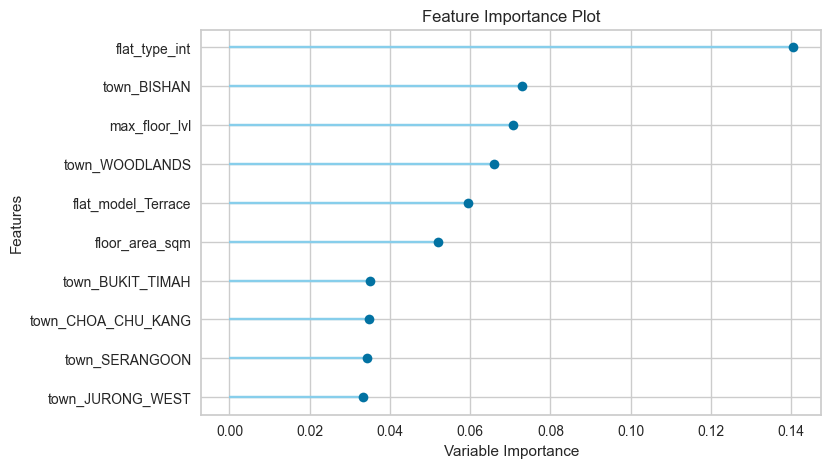

In [129]:
# Plot feature importance for XGboost Regressor
plot_model(xgboost_model, plot='feature')

In [134]:
# Get feature importance data
xg_feature_importance = xgboost_model.feature_importances_

# Assuming `selected_features` is a list of feature names used in the model
xg_feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': xg_feature_importance})

# Sort features by importance
xg_feature_importance_df = xg_feature_importance_df.sort_values(by='Importance', ascending=False)
pd.set_option('display.max_rows', None)

# Print the feature importance
print(xg_feature_importance_df)

                              Feature   Importance
23                      flat_type_int 0.1404872686
26                        town_BISHAN 0.0730001256
6                       max_floor_lvl 0.0705979615
48                     town_WOODLANDS 0.0659739301
67                 flat_model_Terrace 0.0593516417
0                      floor_area_sqm 0.0520901345
30                   town_BUKIT_TIMAH 0.0350415520
32                 town_CHOA_CHU_KANG 0.0348540060
45                     town_SERANGOON 0.0341849774
37                   town_JURONG_WEST 0.0333254784
39                 town_MARINE_PARADE 0.0302389245
53                    flat_model_DBSS 0.0288483053
15                 Hawker_Within_500m 0.0272663124
28                   town_BUKIT_MERAH 0.0244211722
49                        town_YISHUN 0.0210824627
57                 flat_model_Model_A 0.0198908001
14            Hawker_Nearest_Distance 0.0198070128
42                    town_QUEENSTOWN 0.0193125084
36                   town_JURON

In [131]:
# Predict on the training data
train_predictions = predict_model(xgboost_model, data=train_data)

# Calculate RMSE and R² for training data
train_rmse = np.sqrt(mean_squared_error(train_predictions[target], train_predictions['prediction_label']))
train_r2 = r2_score(train_predictions[target], train_predictions['prediction_label'])

print(f"Train RMSE: {train_rmse}")
print(f"Train R^2: {train_r2}")

# Predict on the test data
test_predictions = predict_model(xgboost_model, data=test_data)

# Calculate RMSE and R² for test data
test_rmse = np.sqrt(mean_squared_error(test_predictions[target], test_predictions['prediction_label']))
test_r2 = r2_score(test_predictions[target], test_predictions['prediction_label'])

print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {test_r2}")

                       Model              MAE                  MSE  \
0  Extreme Gradient Boosting 18668.9570312500 633338752.0000000000   

              RMSE           R2        RMSLE         MAPE  
0 25166.2226562500 0.9693000000 0.0555000007 0.0425999984  
Train RMSE: 25166.22265625
Train R^2: 0.9692650984586931
                       Model              MAE                  MSE  \
0  Extreme Gradient Boosting 19821.2050781250 733055360.0000000000   

              RMSE           R2        RMSLE         MAPE  
0 27074.9960937500 0.9640000000 0.0584999993 0.0447999984  
Test RMSE: 27074.994140625
Test R^2: 0.9640066191403165


Export model for streamlit

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("XGBoost model saved as model.pkl")

### 11. Conclusion

We can see that the top 3 models are **1) Random Forest, 2) Extra Trees and 3) XGboost.** 

Despite Extra Trees having the highest train RMSE at 14894.6674, it has a large gap to the test RMSE 26421.6952, while having R2 scores of 0.9892 and 0.9657 respectively. 

Random Forest likewise had RMSE values of 16789.8727 and 26227.7871 respectively, while having R2 scores of 0.9863 and 0.9662 respectively. 

As such, we opted to go with XGBoost, where its RMSE values of **25166.2226** and **27074.9941** respectively, while having R2 scores of **0.9692** and **0.9640** respectively. 

### 12. Insights

Based on XGboost,

**1. Flat Type**: The larger the room type, the higher the price.

**2. Floor level**: The higher the floor, the higher the price. High floors typically mean unblocked views, and also may mean it’s more cooling with stronger breezes.

**3. Certain towns**: Bishan had a higher price, likely due to its proximity to top schools. Woodlands also featured strongly, likely due to its unique accessibility to Johor Bahru.

**4. Flat models**: Terrace type flat models account for higher prices, due to its  uniqueness. There are only 285 of such units in Singapore, and these are no longer being created anymore, creating a scarcity effect.

### 13. Limitations

**Number of features**: Due to the presence of string variables, we had to encode them into multiple variables which led to us having 70 variables, which would have probably delivered higher model accuracy. However, cutting down may come at the expense of model accuracy.